# Insurance Premium Project

In [1]:
# importing required Libraries
import numpy as np 
import pandas as pd # to create dataframe
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler # Scaling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # for splitting data
from sklearn.linear_model import LinearRegression # for linear regression model
from sklearn.tree import DecisionTreeRegressor #for decision tree model
from sklearn.ensemble import RandomForestRegressor # for Random forest ensemble model
from sklearn.neighbors import KNeighborsRegressor # for KNN model
from sklearn.ensemble import AdaBoostRegressor # for ada boosting ensemble model
from sklearn.svm import SVR # for SVR
from sklearn.ensemble import StackingRegressor #for Stacking model
from sklearn import metrics as me
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading insurance premium data in Idf variable
Idf=pd.read_csv('DS3_C6_S1_Regression_Insurance_Data_Project.csv') #loading file
Idf

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [3]:
#Shape of data
Idf.shape

(1338, 8)

In [4]:
# Data column, null value ,count and type displayed by info function 
Idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [5]:
# Idf data Statistical values displayed through describe function
Idf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


# Data Exploration

In [6]:
# grouping according to the type of column categorical and numerical
cat=[]
num=[]
for i in Idf.columns:  #loop for iterating each column
    if Idf[i].nunique()<11:
        cat.append(i)   # adding column to list cat
    else:
        num.append(i)   # adding column to list num

In [7]:
cat # categorical columns

['sex', 'classif', 'children', 'smoker', 'region']

In [8]:
num # numerical columns

['age', 'bmi', 'charges']

# Univariate Plots

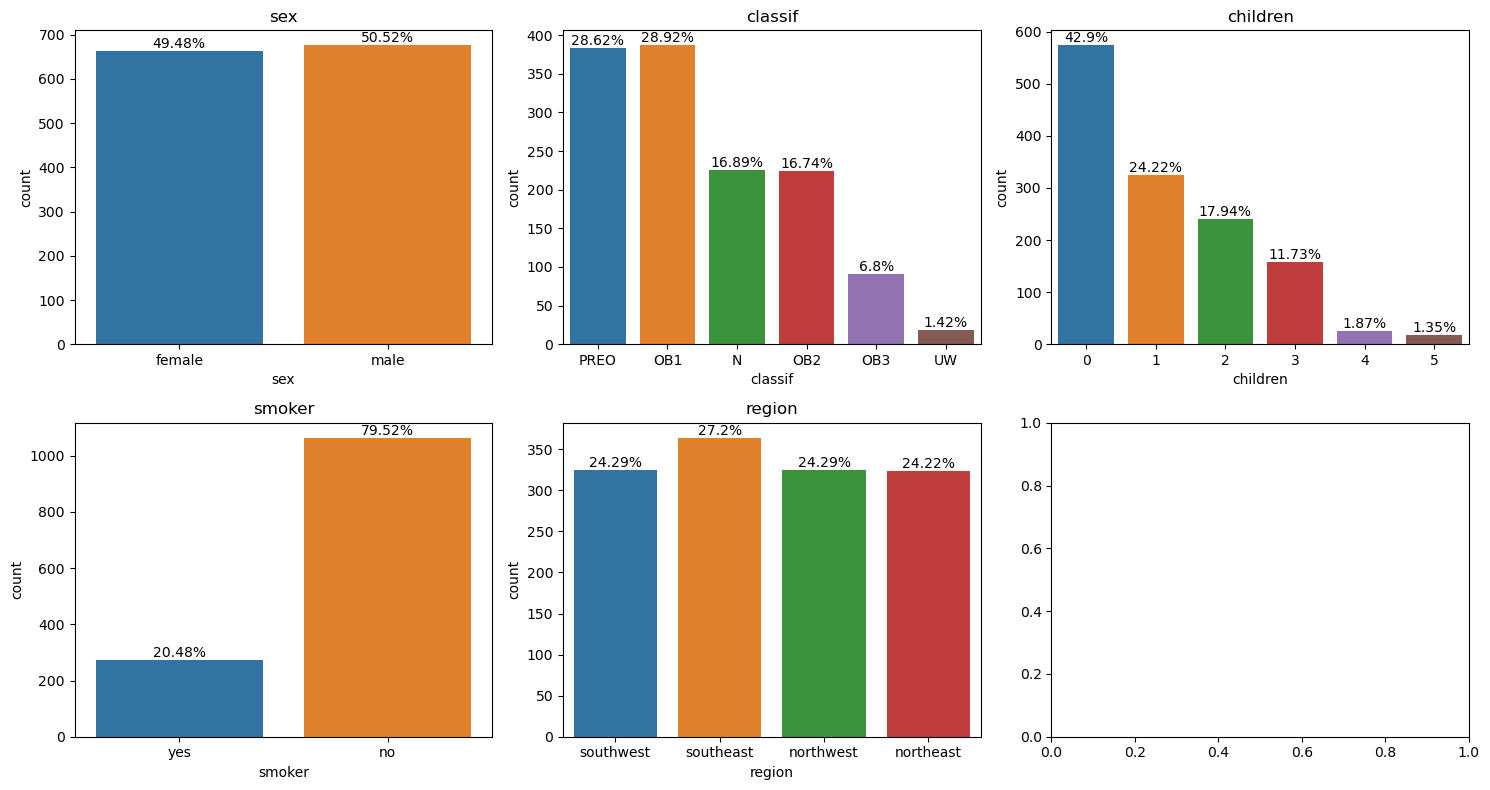

In [9]:
# Ploting according to count and each categorical column
cat_col=cat
num_cols=3
num_rows=int(len(cat_col)/num_cols)+1 # mentioning subplot rows
fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(15,8))
for col,ax in zip(cat_col,axs.flatten()[:len(cat_col)]):  #zipping the categorical each column with their values
    sns.countplot(data=Idf,x=Idf[col],ax=ax)
    for bar in ax.patches:                                    # for displaying percentage at the middle of the bar
        percentage=f'{round(bar.get_height()/len(Idf)*100,2)}%'
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),va='bottom',ha='center');
    ax.set_title(col);

Figure 1 Maximum percentage is of male in gender, 

Figure 2 PREO in Classif,

Figure 3 no children in children column,

Figure 4 person who didn't smoke in smoker and

Figure 5 southwest region in region.

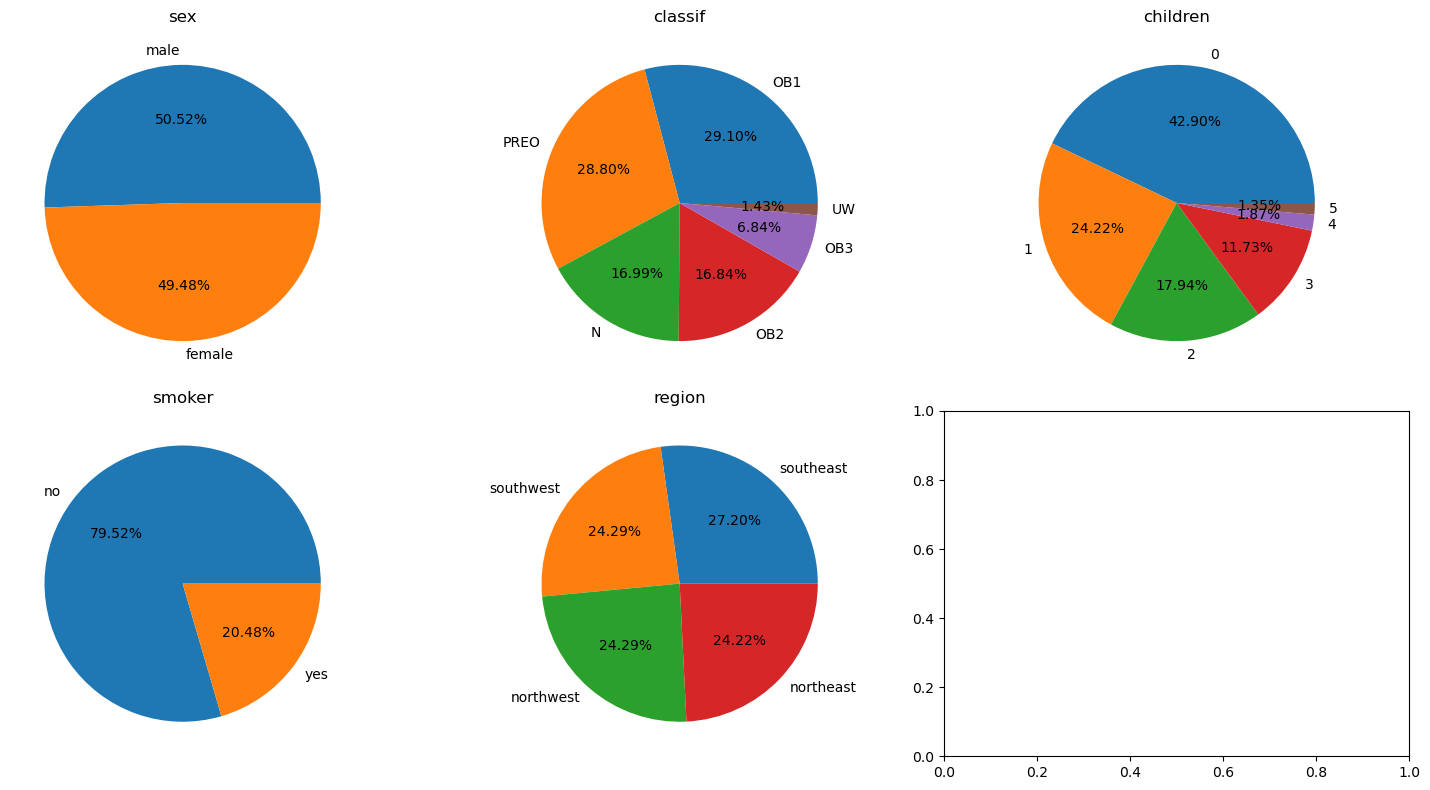

In [10]:
# Ploting pie chart according to each categorical column
cat_col=cat
num_cols=3
num_rows=int(len(cat_col)/num_cols)+1
fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(15,8))
for col,ax in zip(cat_col,axs.flatten()[:len(cat_col)]):                  #zipping the categorical each column with their values
    ax.pie(labels=Idf[col].value_counts().index,x=Idf[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col);

From pie chart also we can see that Maximum percentage is of 

Figure 1 male in gender, 

Figure 2 PREO in Classif,

Figure 3 no children in children column,

Figure 4 person who didn't smoke in smoker and 

Figure 5 southwest region in region.

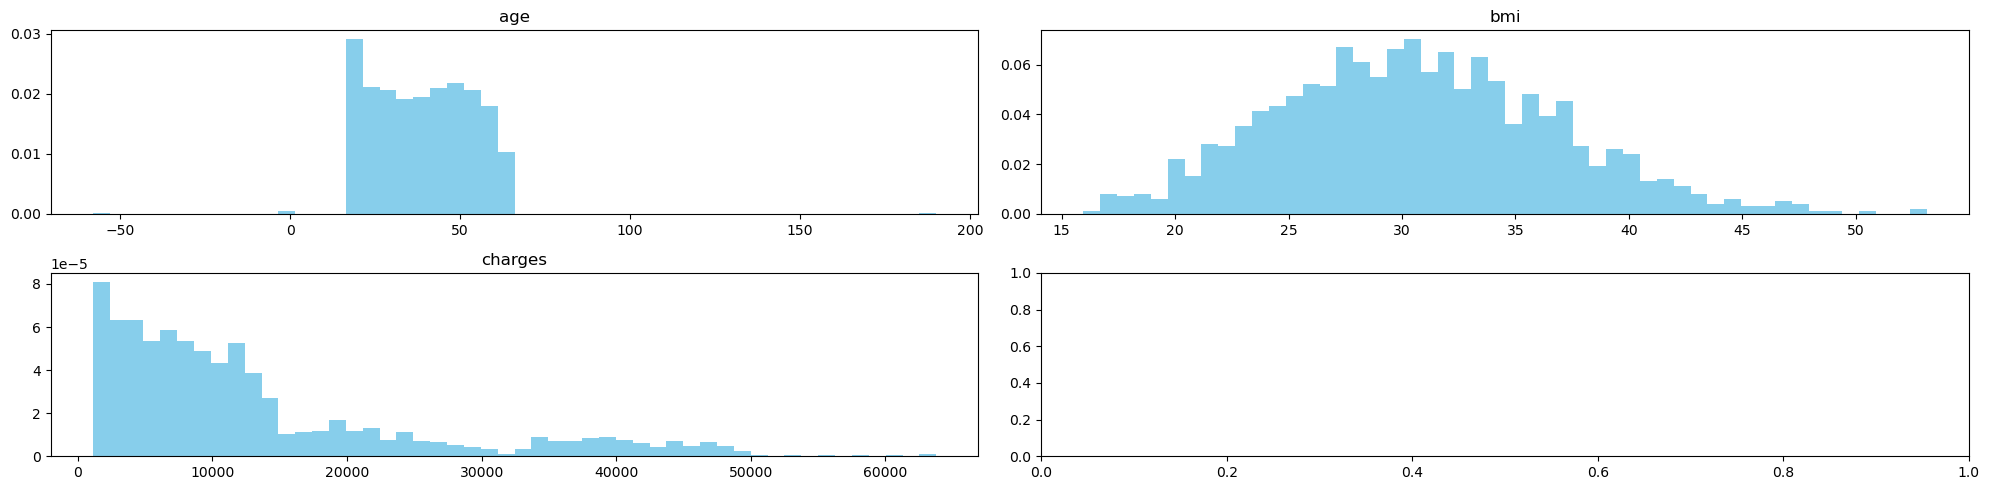

In [11]:
# Ploting histogram according to each categorical column
num_cols=num
num_col=2
n_bins=50
num_rows=int(len(num_cols)/num_col)+1
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,5))
for col,axs in zip (num_cols,axs.flatten()[:len(num_cols)]):    #zipping the categorical each column with their values
    axs.hist(Idf[col],bins=n_bins,density=True,color='skyblue')
    axs.set_title(col)
plt.show()

We can conclude from histogram that bmi has more normally distributed data than others and charges data is right skewed.

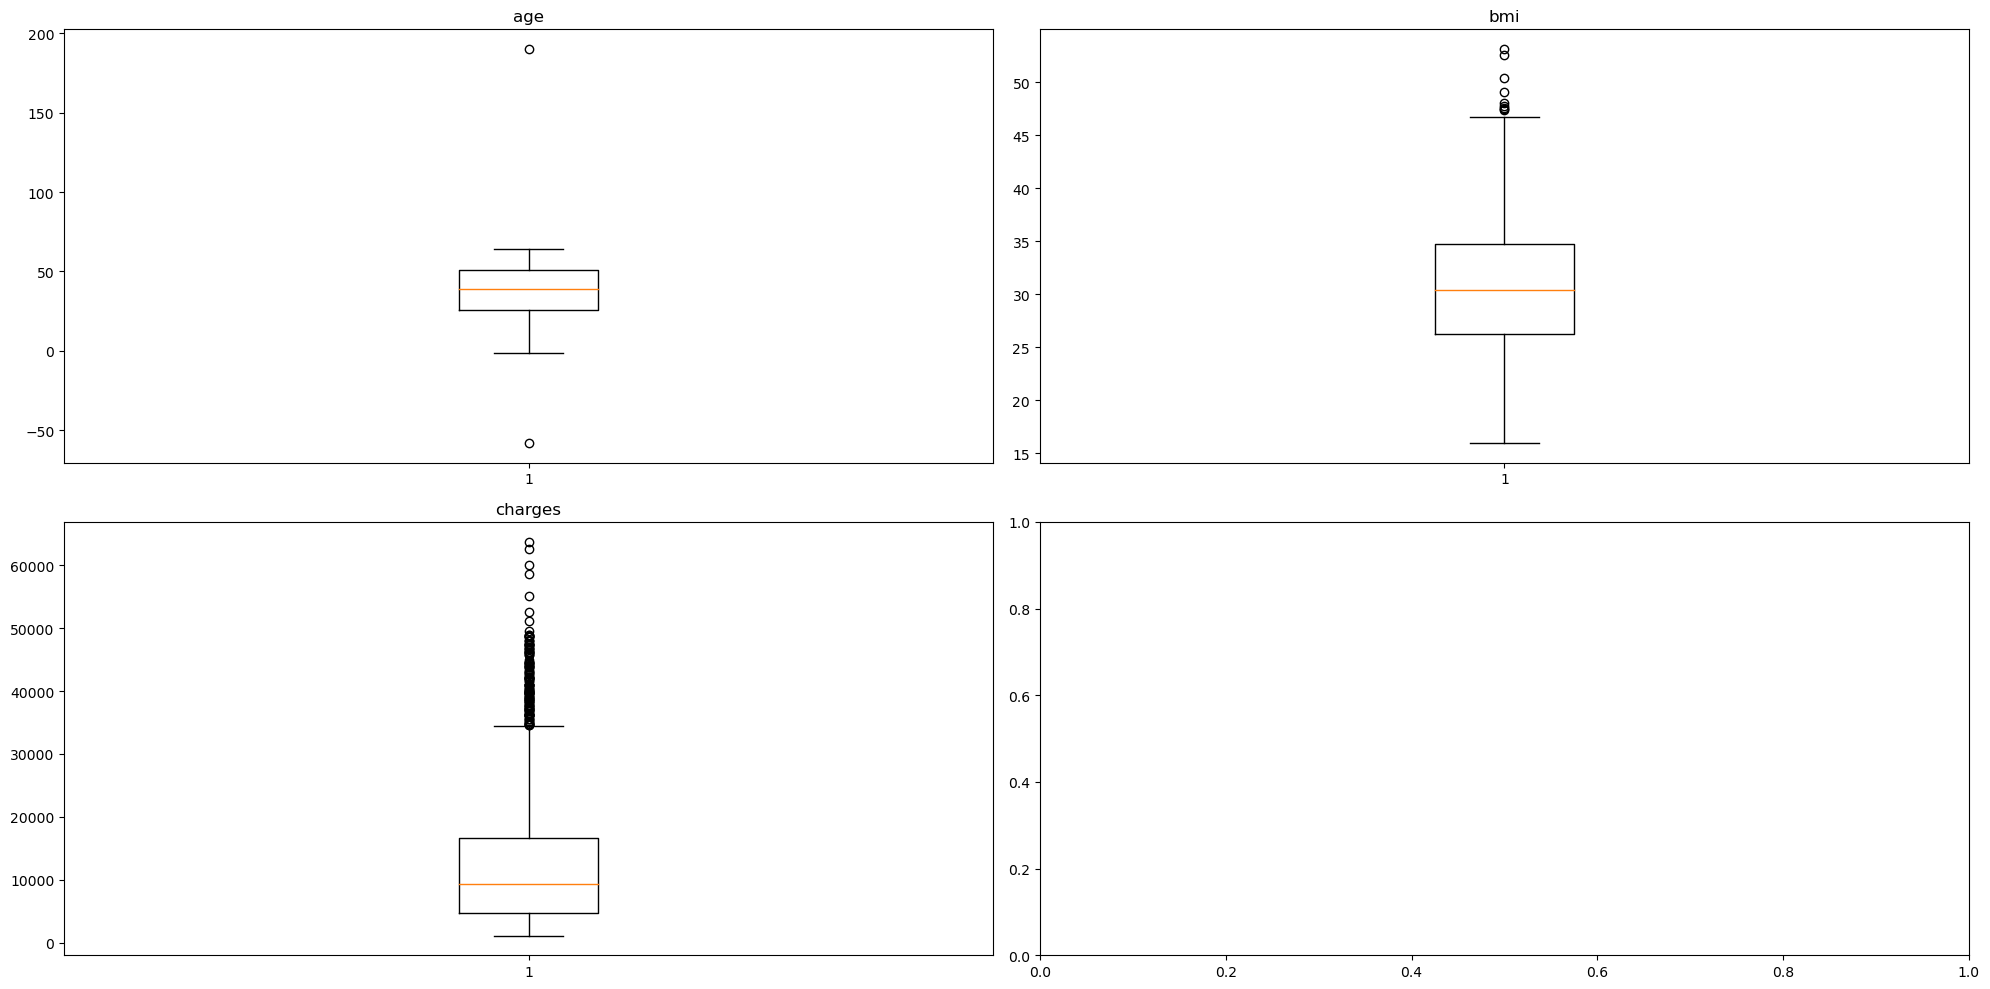

In [12]:
# Ploting box plot according to each categorical column
num_cols=num
num_col=2
num_rows=int(len(num_cols)/num_col)+1
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,10))
for col,axs in zip (num_cols,axs.flatten()[:len(num_cols)]):         #zipping the categorical each column with their values
    axs.boxplot(Idf[col])
    axs.set_title(col)
plt.show()

Here we can see that we have outliers in all the above column age,bmi and charges. So,we have to remove the outliers mainly from age as these are inappropriate to data.

# Bivarriate Plots

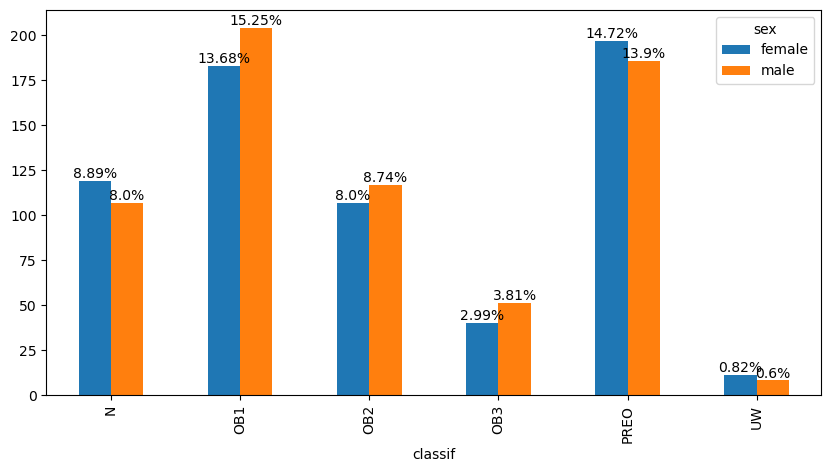

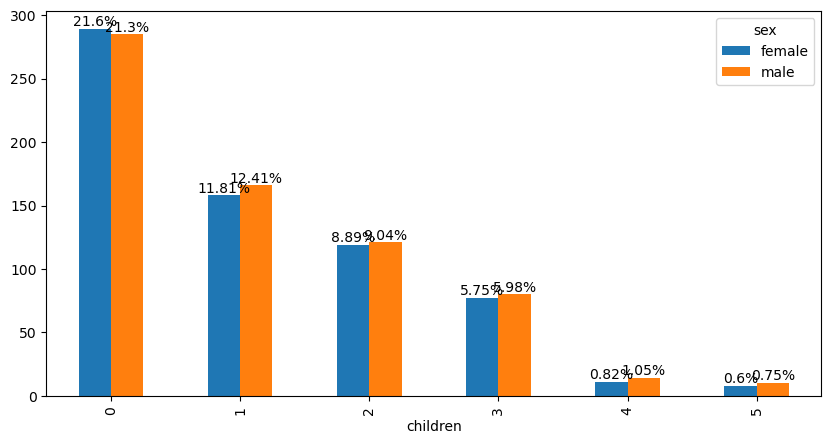

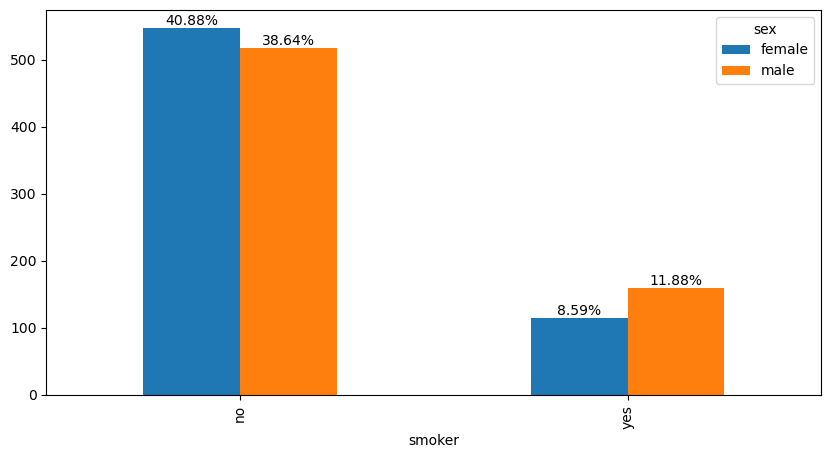

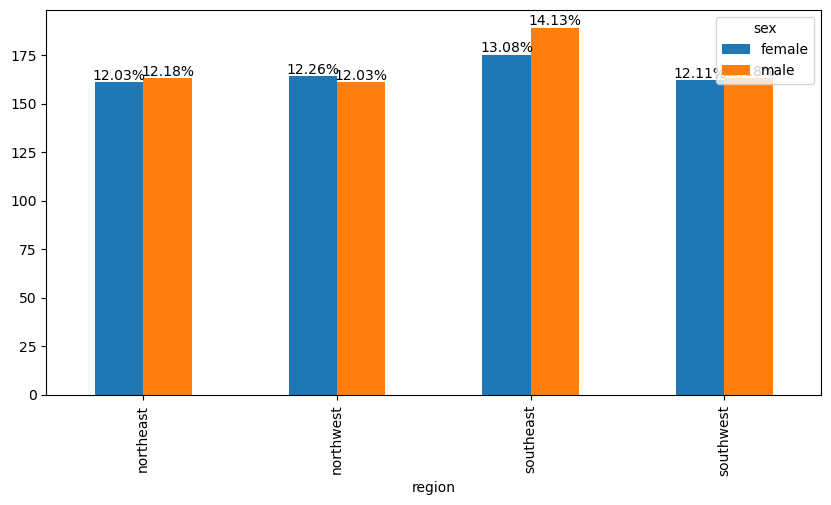

In [13]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='sex':
        ax=pd.crosstab(Idf[col],Idf['sex']).plot(kind='bar',figsize=(10,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(Idf)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

In classif maximum is of OB1 with gender as male.

In children maximum percentage is of children having no children with gender as female.

In smoker we have maximum no smoker females.

Inregion we have maximum males from southeast region.

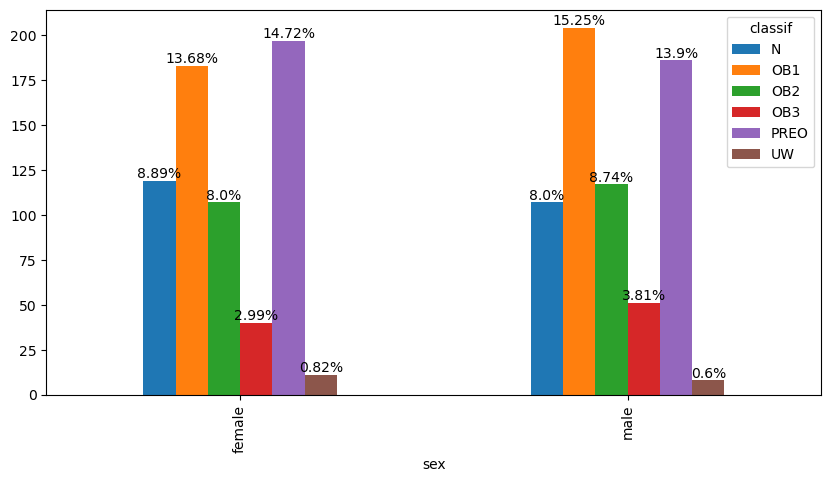

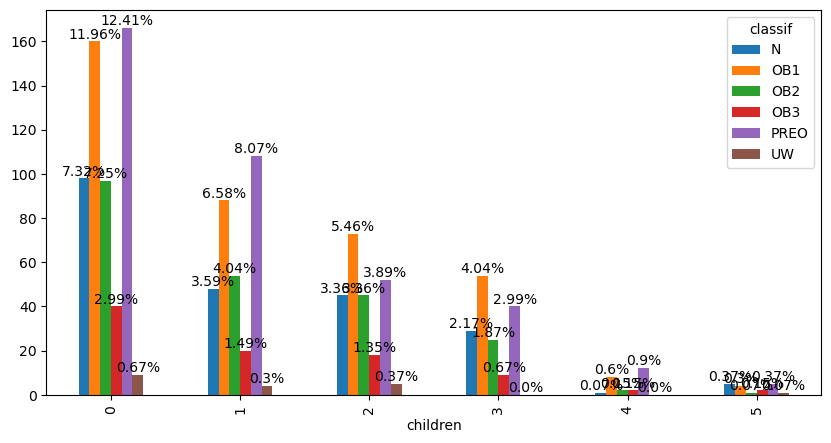

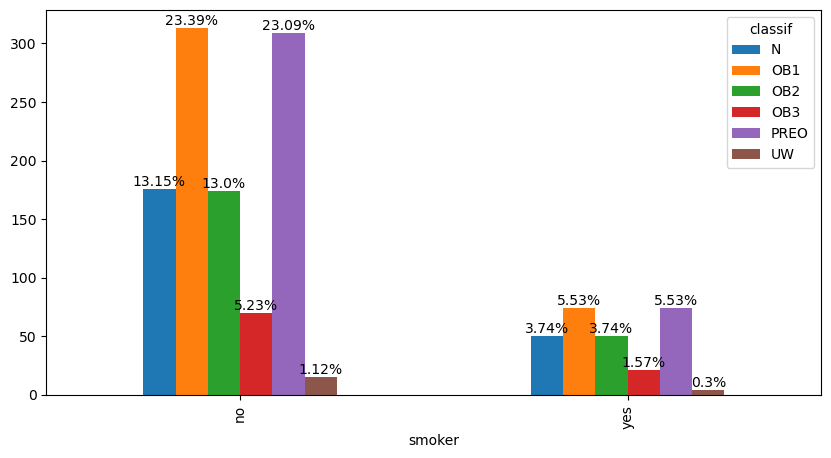

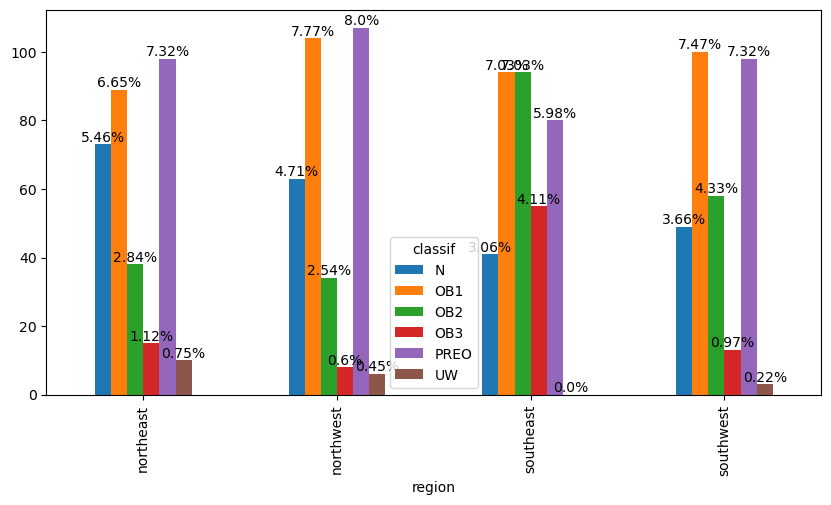

In [14]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='classif':
        ax=pd.crosstab(Idf[col],Idf['classif']).plot(kind='bar',figsize=(10,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(Idf)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

As per classif column we have maximum 

males from OB1,

Zero children from PREO,

no smoker from OB1 and 

northwest region PREO.


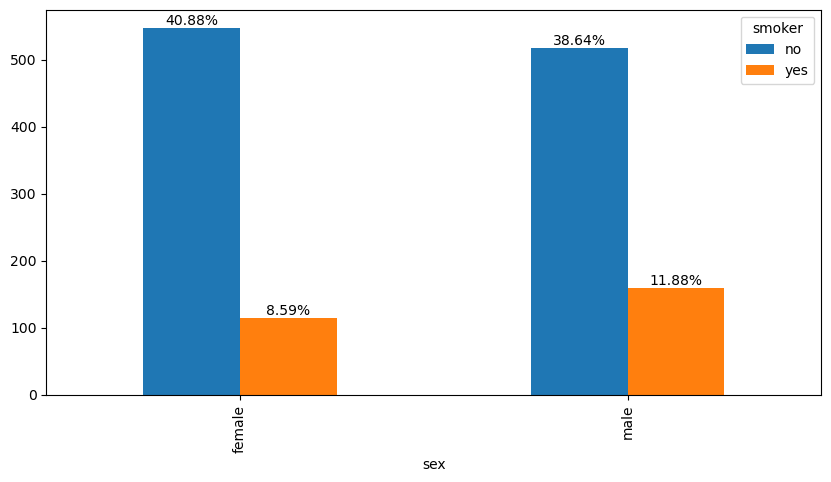

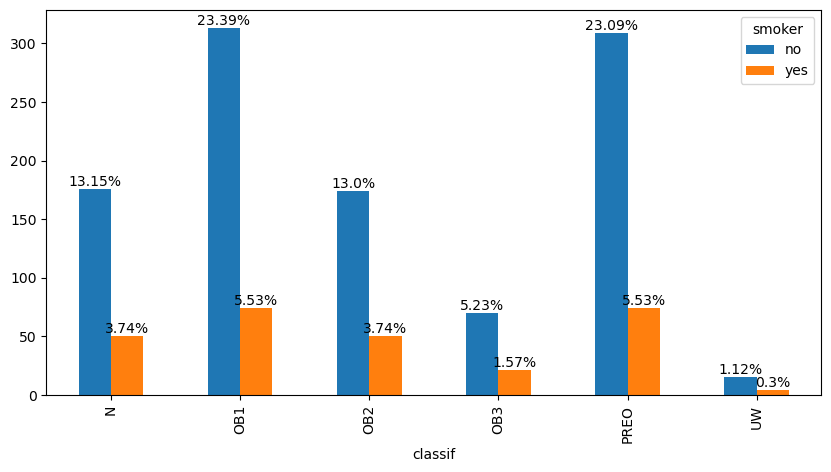

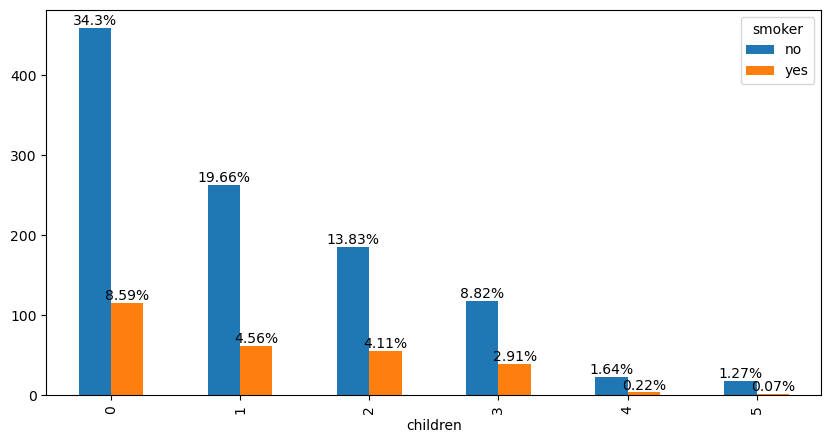

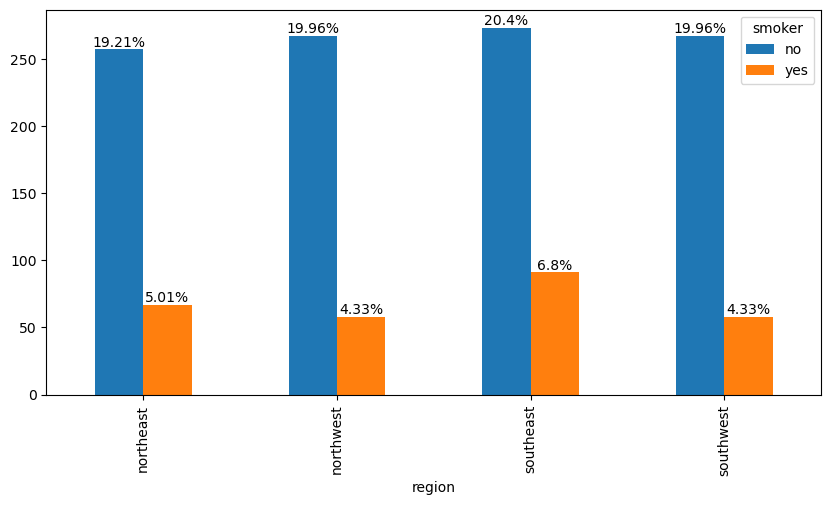

In [15]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='smoker':
        ax=pd.crosstab(Idf[col],Idf['smoker']).plot(kind='bar',figsize=(10,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(Idf)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

As per smoker we have maximum 

no smoker female, 

no smoker classif as OB1,

have Zero children no smoker,

southeast region highest no smoker.

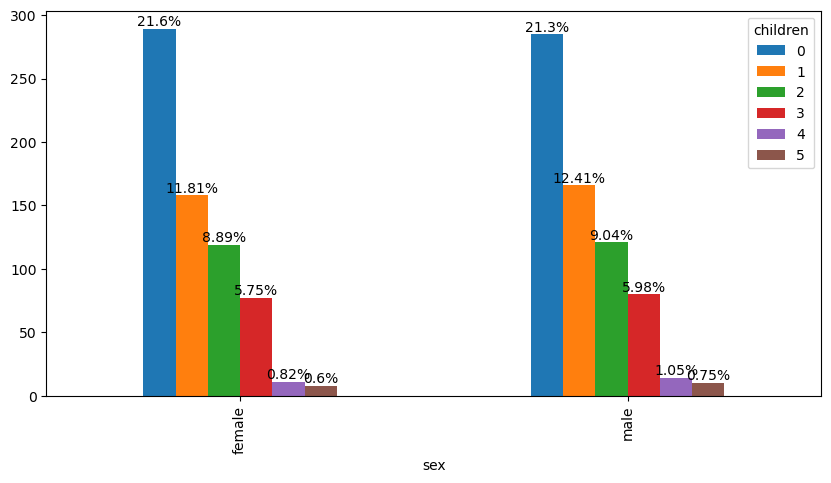

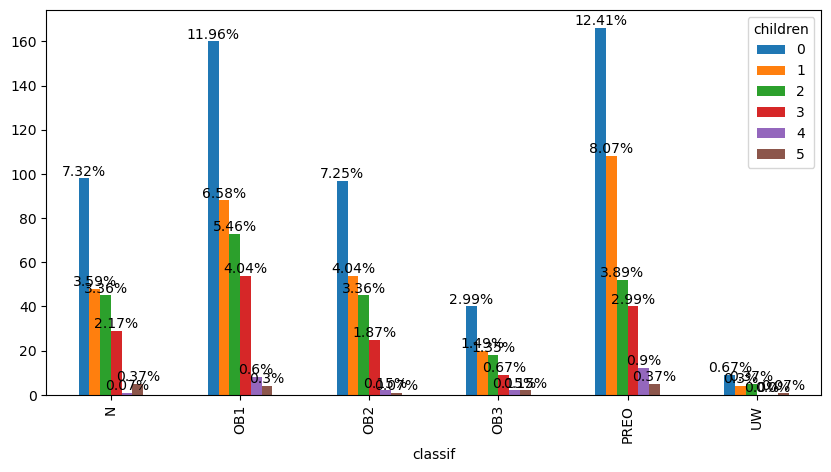

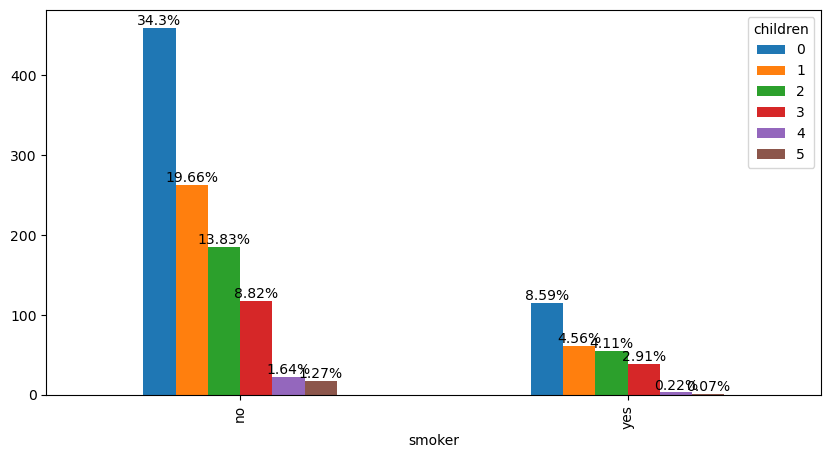

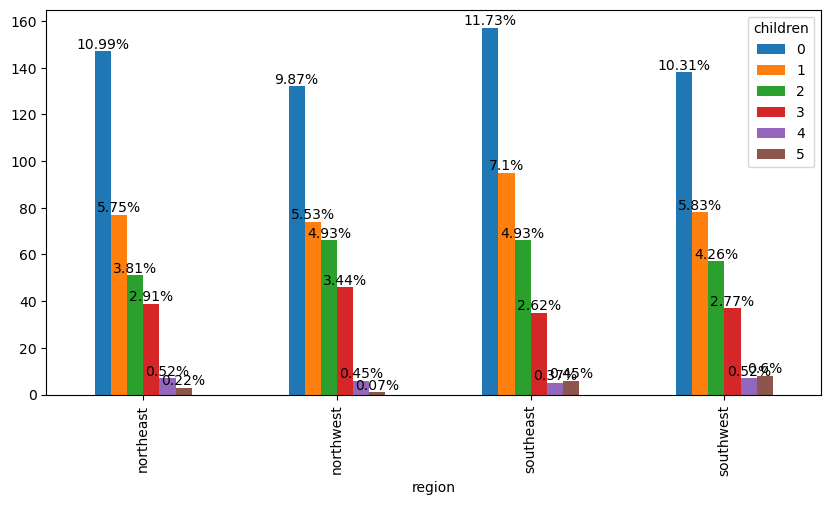

In [16]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='children':
        ax=pd.crosstab(Idf[col],Idf['children']).plot(kind='bar',figsize=(10,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(Idf)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

As per the children column we have maximum percentage of no children in all the columns.

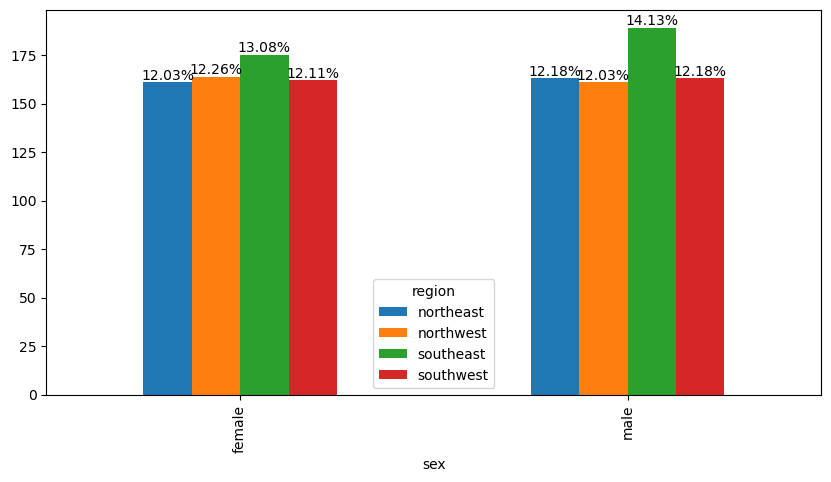

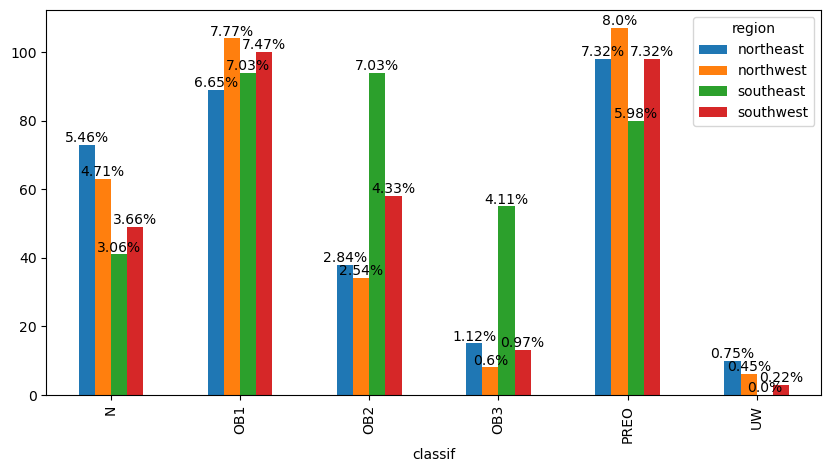

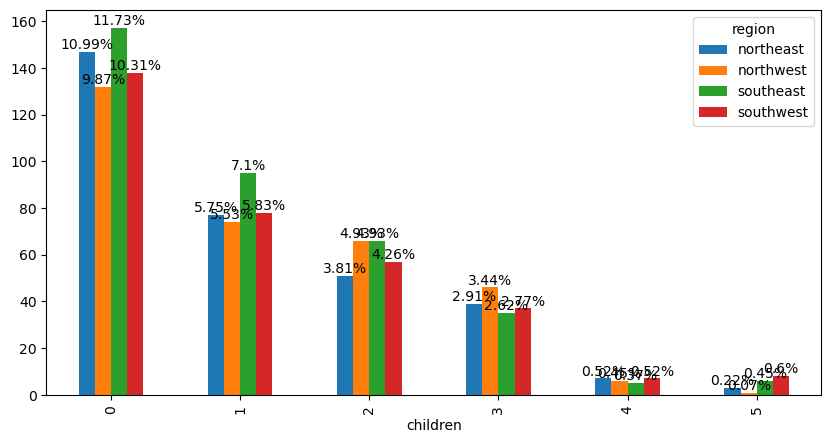

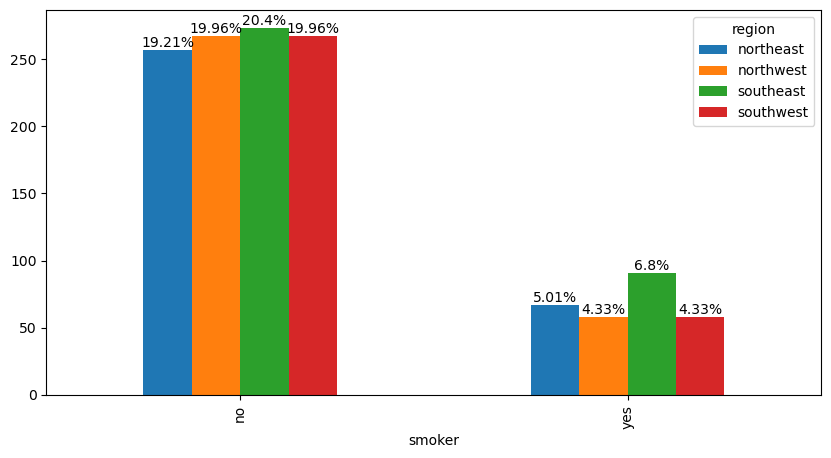

In [17]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='region':
        ax=pd.crosstab(Idf[col],Idf['region']).plot(kind='bar',figsize=(10,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(Idf)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

As per the region we have maximum

males from southeast region,

classif as PREO from northwest

no children people are most of southeast

no smoker people from southeast.

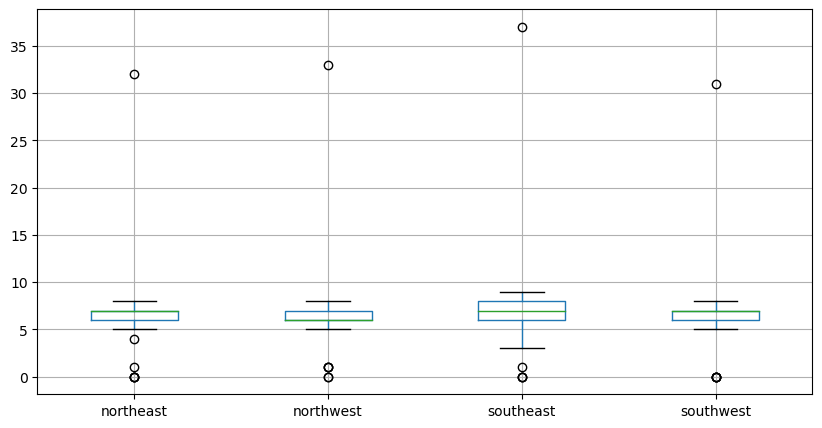

In [18]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(Idf['age'],Idf['region']).boxplot(figsize=(10,5))

Every region have age with outliers and the dispersed data is of southeast region.

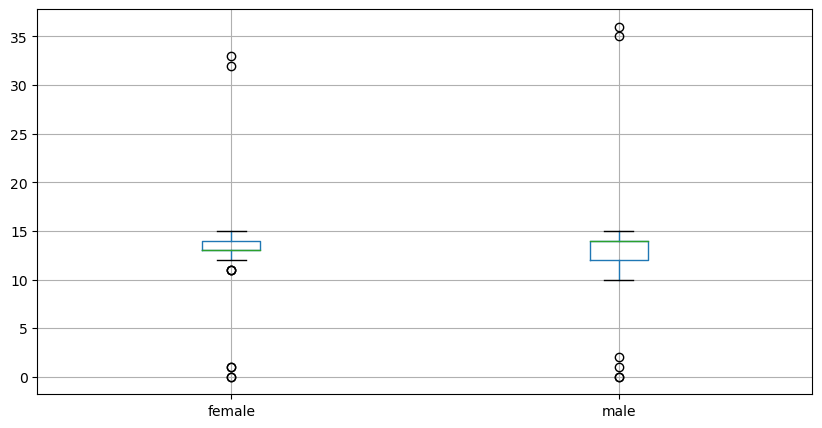

In [19]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(Idf['age'],Idf['sex']).boxplot(figsize=(10,5))

Males have more data which is dispersed.

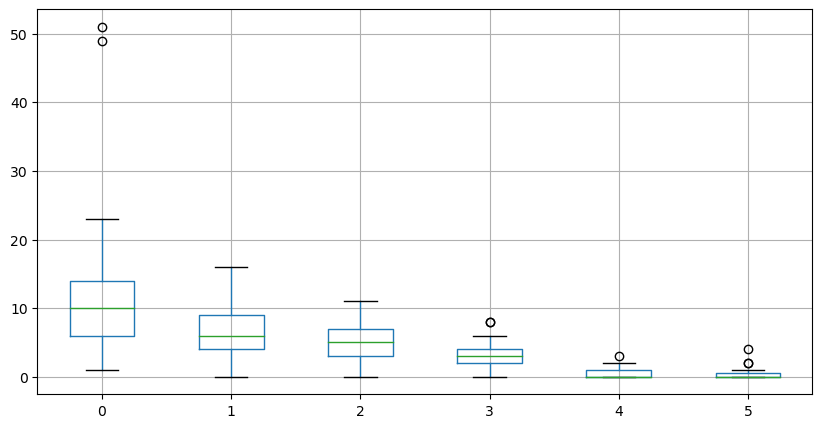

In [20]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(Idf['age'],Idf['children']).boxplot(figsize=(10,5))

People having no children have higher number.With the increase in number og children the count of people decreases.

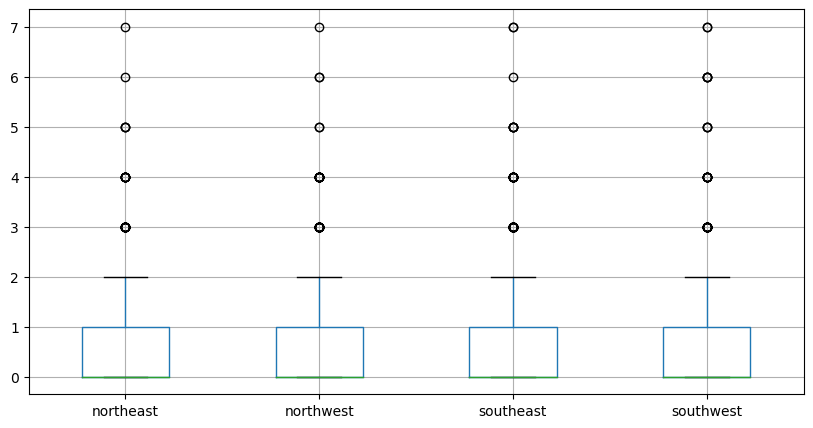

In [21]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(Idf['bmi'],Idf['region']).boxplot(figsize=(10,5))

Every region have the equal number of peoples with different bmi having equal number of outliers.

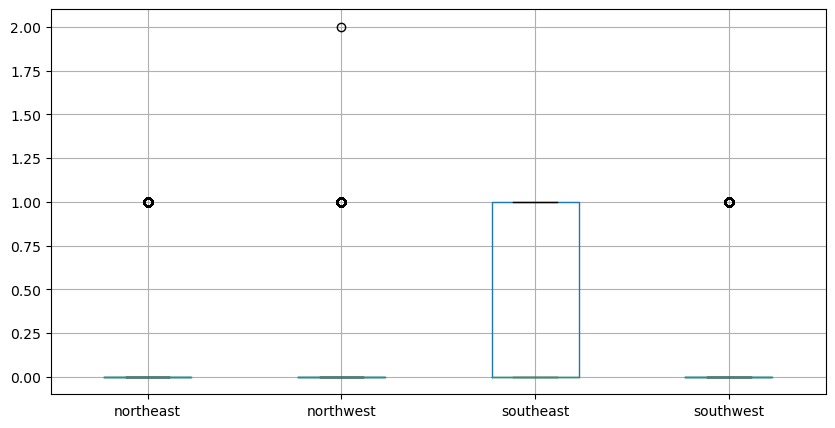

In [22]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(Idf['charges'],Idf['region']).boxplot(figsize=(10,5))

Southeast region have higher disperesed data of charges without any outliers.

# Multivariate Plots

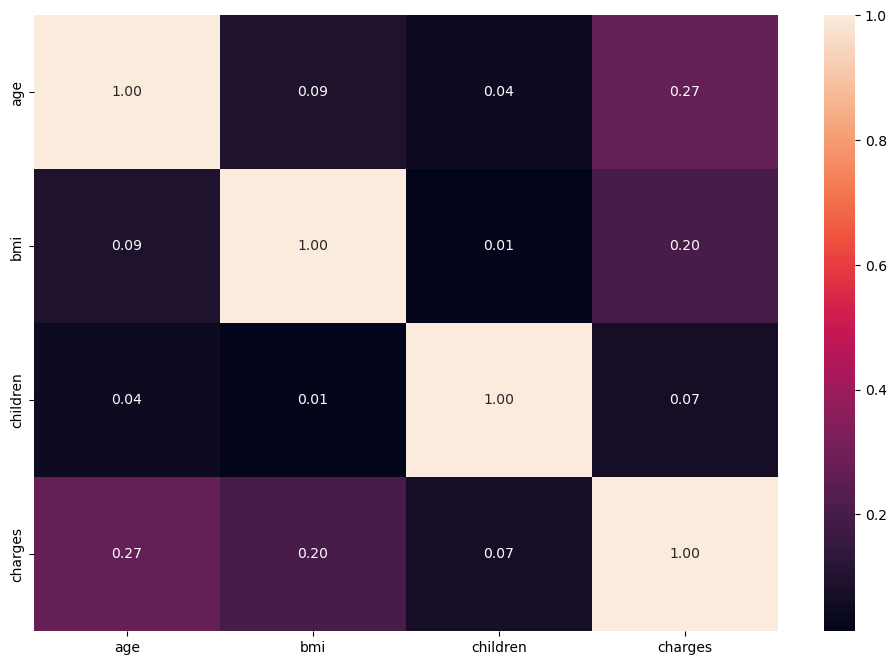

In [23]:
# Ploting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(Idf.corr(),annot=True,fmt='.2f');

As per the relation with target variable we can say age column have highest correlation followed by bmi.

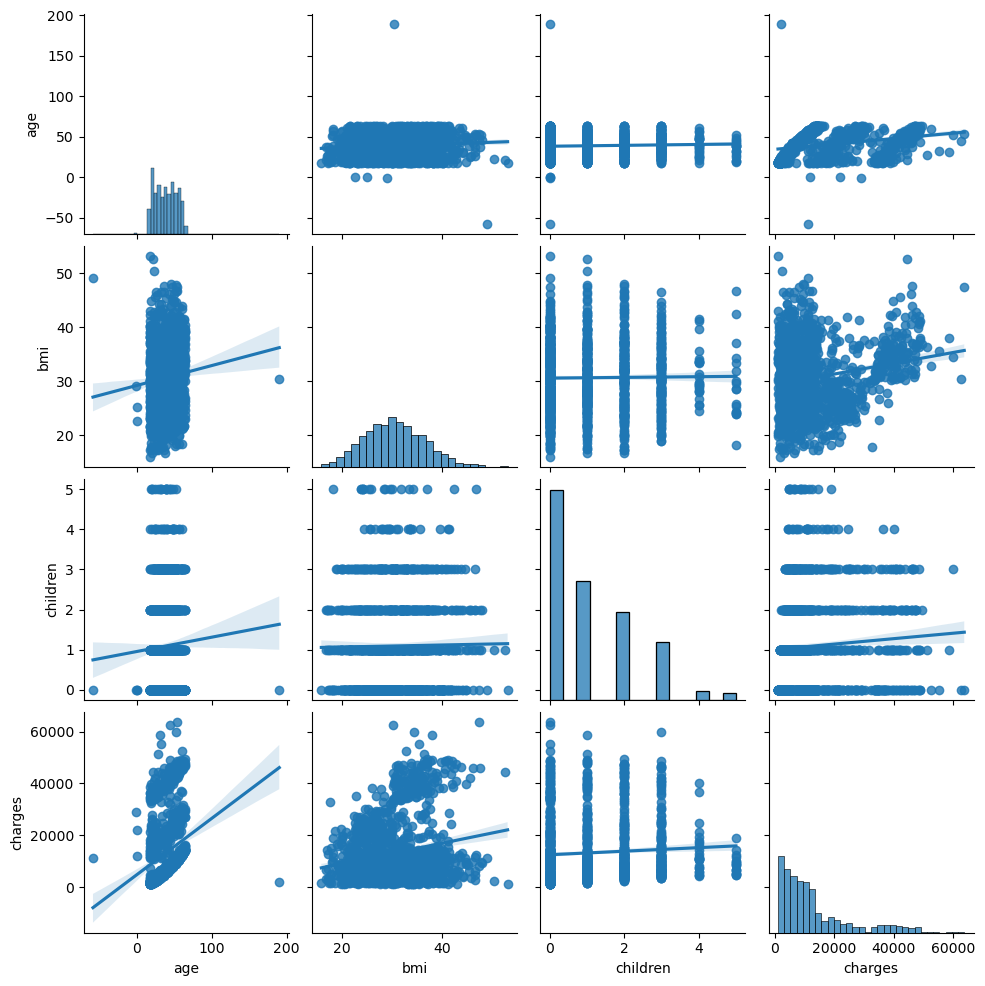

In [24]:
# Ploting pairplot which have barchart and scatterplot
sns.pairplot(Idf,kind='reg');

In some of the plots we have linear relationship like between age and charges, sex and bmi, region and bmi, smoker and charges while some of them having no relationship.

# Data Prepration 

# Missing value imputation

In [25]:
# Identifying missing or null values
Idf.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
# Imputing missing values through mode as the missing values are categorical
Idf['classif'].fillna(Idf['classif'].mode()[0],inplace=True)

In [27]:
D=Idf[(Idf['age']<10)|(Idf['age']>100)] # finding columns age with condition

In [28]:
D # Display

,age,sex,bmi,classif,children,smoker,region,charges
3,0,male,22.705,N,0,no,northwest,21984.47061
116,-58,male,49.060,OB3,0,no,southeast,11381.32540
565,190,female,30.495,OB1,0,no,northwest,2128.43105
1294,0,male,25.175,PREO,0,no,northeast,11931.12525
1337,-1,female,29.070,PREO,0,yes,northwest,29141.36030


In [29]:
Idf.drop(index=D.index,axis=0,inplace=True) #droping index

In [30]:
Idf.reset_index(drop=True,inplace=True) # setting new index
Idf

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.90,PREO,0,yes,southwest,16884.9240
1,18,male,33.77,OB1,1,no,southeast,1725.5523
2,28,male,33.00,OB1,3,no,southeast,4449.4620
3,32,male,28.88,PREO,0,no,northwest,3866.8552
4,31,female,25.74,PREO,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...,...
1328,52,female,44.70,OB3,3,no,southwest,11411.6850
1329,50,male,30.97,OB1,3,no,northwest,10600.5483
1330,18,female,31.92,OB1,0,no,northeast,2205.9808
1331,18,female,36.85,OB2,0,no,southeast,1629.8335


# Feature engineering data transformation 

In [31]:
#Converting categorical data to numerical through label encoding 
lbl_end=preprocessing.LabelEncoder() # assigning variable to label encoding
Idf['sex']=lbl_end.fit_transform(Idf['sex'])   # encoding sex column
Idf['classif']=lbl_end.fit_transform(Idf['classif'])   # encoding classif column
Idf['smoker']=lbl_end.fit_transform(Idf['smoker'])   # encoding smoker column
Idf['region']=lbl_end.fit_transform(Idf['region'])   # encoding region column

In [32]:
X=Idf.drop(columns='charges') # assigning X variable to independent column 
y=Idf['charges']  #assigning y variable to dependent column 

# Feature extraction

# PCA (Principal Component Analysis)

In [33]:
# Through different number of component finding out the variance ratio
from sklearn.decomposition import PCA
var_ratio={}
for i in range(2,8):   # loop for iterating number of components
    pca=PCA(n_components=i)
    pd_data1=pca.fit(X)
    var_ratio[i]=sum(pd_data1.explained_variance_ratio_)

In [34]:
var_ratio # Variance ratio

{2: 0.9776556475137775,
 3: 0.9872466495119535,
 4: 0.9933030808640548,
 5: 0.9982779832917258,
 6: 0.9993311300156648,
 7: 1.0}

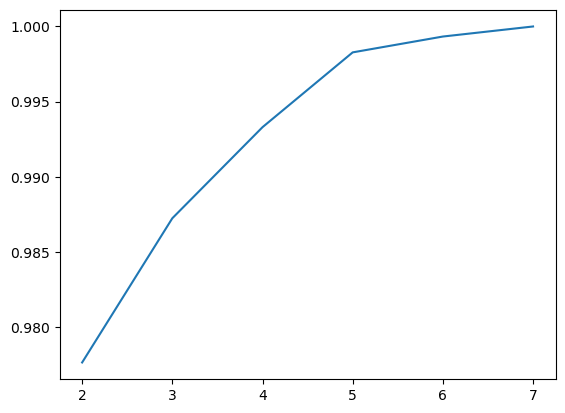

In [35]:
# Plotting of variance ratio as per number of components
pd.Series(var_ratio).plot(kind='line');

In [36]:
# Fitting and transforming data through Principal component analysis
pca=PCA(n_components=2)
pd_data1=pca.fit(X)
pd_data2=pca.fit_transform(X)

In [37]:
df=pd.DataFrame(pd_data2) # Dataframe after reducing columns through PCA

In [38]:
df

,0,1
0,-20.307974,-1.514956
1,-20.971131,4.307909
2,-11.024041,2.969963
3,-7.274372,-1.337485
4,-8.451240,-4.387376
...,...,...
1328,13.610533,13.337619
1329,10.822860,-0.344998
1330,-21.081240,2.397447
1331,-20.796405,7.397181


# We are not using PCA in model building data as we have very less number of features and all are important if we will use PCA in this data it will decrease our accuracy of model.

# Feature scaling

In [39]:
# Scaling of data through Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale=sc.fit_transform(Idf)
X_y=pd.DataFrame(scale,columns=Idf.columns)

In [40]:
X_y # Scaled data

,age,sex,bmi,classif,children,smoker,region,charges
0,-1.438763,-1.009800,-0.454069,1.284529,-0.911729,1.970478,1.341014,0.299006
1,-1.510051,0.990295,0.511298,-0.690416,-0.082149,-0.507491,0.436372,-0.952385
2,-0.797168,0.990295,0.384666,-0.690416,1.577011,-0.507491,0.436372,-0.727529
3,-0.512014,0.990295,-0.292900,1.284529,-0.911729,-0.507491,-0.468269,-0.775623
4,-0.583302,-1.009800,-0.809298,1.284529,-0.911729,-0.507491,0.436372,-0.784722
...,...,...,...,...,...,...,...,...
1328,0.913753,-1.009800,2.308822,0.626214,1.577011,-0.507491,1.341014,-0.152804
1329,0.771176,0.990295,0.050817,-0.690416,1.577011,-0.507491,-0.468269,-0.219763
1330,-1.510051,-1.009800,0.207052,-0.690416,-0.911729,-0.507491,-1.372910,-0.912726
1331,-1.510051,-1.009800,1.017828,-0.032101,-0.911729,-0.507491,0.436372,-0.960287


In [41]:
# Assigning variables to features and targeted column
X=X_y.drop(columns='charges')
y=X_y['charges']

# Linear Regression through K Fold

In [42]:
#Linear Regression through K Fold
name=[]
acc=[]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(LR,X,y,scoring='r2',cv=cv,n_jobs=-1)
print('Mean Score using LR:',(score).mean()*100)
name.append('LR')
acc.append(score.mean()*100)

Mean Score using LR: 74.3465209119454


# Decision tree Regressor KFold

In [43]:
#Decision tree Regressor KFold
from sklearn.tree import DecisionTreeRegressor
DT= DecisionTreeRegressor()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(DT,X,y,scoring='r2',cv=cv,n_jobs=-1)
print('Mean Score using DT:',(score.mean())*100)
name.append('DT')
acc.append(score.mean()*100)

Mean Score using DT: 70.12837399045951


# Bagging with random forest KFold

In [44]:
#Bagging with random forest KFold
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(RF,X,y,scoring='r2',cv=cv,n_jobs=-1)
print('Mean Score using RF:',(score.mean())*100)
name.append('RF')
acc.append(score.mean()*100)

Mean Score using RF: 83.43650706530805


# KNeighbor Regressor KFold

In [45]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(KNN,X,y,scoring='r2',n_jobs=-1,cv=cv)
print('Mean Score using KNN:',(score.mean())*100)
name.append('KNN')
acc.append(score.mean()*100)

Mean Score using KNN: 83.0129513898988


# Ada Boost Regressor KFold

In [46]:
from sklearn.ensemble import AdaBoostRegressor
AD=AdaBoostRegressor()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(AD,X,y,scoring='r2',n_jobs=-1,cv=cv)
print('Mean Score using AD:',(score.mean())*100)
name.append('ADA')
acc.append(score.mean()*100)

Mean Score using AD: 81.52974751983223


# Stacking through KFold

In [47]:
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

lbl=[]
#BASE Model
lbl.append(('AD',AdaBoostRegressor()))
lbl.append(('KNN',KNeighborsRegressor()))
lbl.append(('DT',DecisionTreeRegressor()))
lbl.append(('RF',RandomForestRegressor()))
lbl.append(('SVM',SVR()))
#Meta Model
l1=LinearRegression()
#define the stacking
model=StackingRegressor(estimators=lbl,final_estimator=l1,cv=7)
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(model,X,y,verbose=0,scoring='r2',n_jobs=-1,cv=cv)
print('Mean Score using Stacking:',(score.mean())*100)
name.append('Stacking')
acc.append(score.mean()*100)

Mean Score using Stacking: 85.84976429550964


# Models with their accuracy

In [48]:
Mod=pd.DataFrame(list(zip(name,acc)),columns=['Model','R2'])
Mod.sort_values(by='R2',ascending=False)

,Model,R2
5,Stacking,85.849764
2,RF,83.436507
3,KNN,83.012951
4,ADA,81.529748
0,LR,74.346521
1,DT,70.128374


Stacking is the best model for above regression problem as it is giving high R2 value or accuracy and as the stacking model contains different base models.

In [49]:
#Prediction of data
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model, X, y, cv=cv)

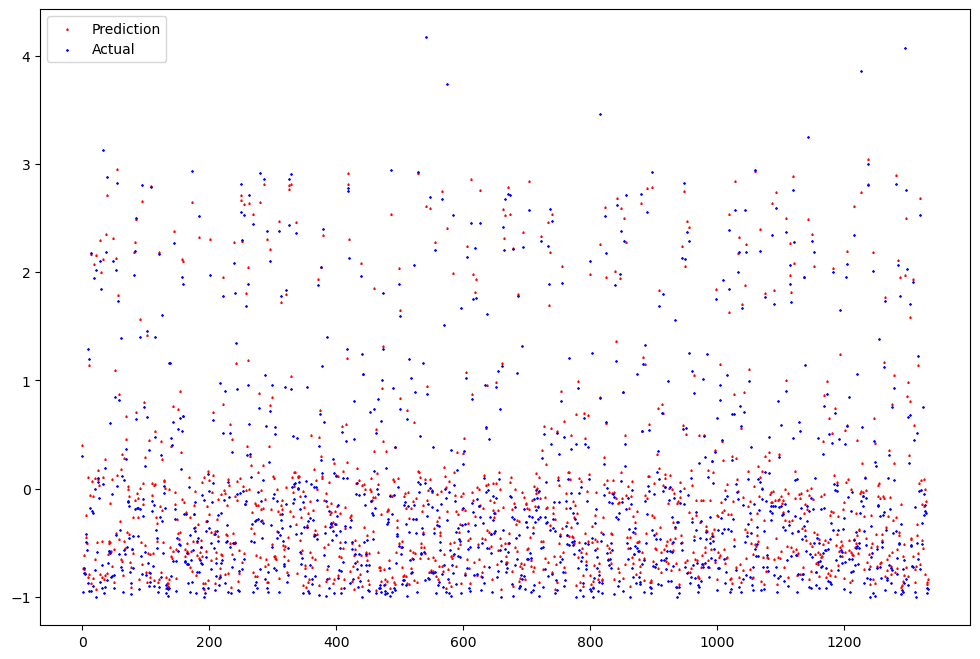

In [50]:
# Plot origional and predicted price values.
plt.figure(figsize=(12,8))
plt.scatter(x=range(1333),y=pred,color='Red',label='Prediction',s=0.8,marker='^')
plt.scatter(x=range(1333),y=y,color='Blue',label='Actual',s=0.8,marker='*')
plt.legend()
plt.show()

In [51]:
X_y['pred']=pred

In [52]:
pedvalue=X_y.drop(columns='charges')

In [53]:
predicitions=sc.inverse_transform(pedvalue)

In [54]:
P=pd.DataFrame(predicitions,columns=pedvalue.columns)
P

,age,sex,bmi,classif,children,smoker,region,pred
0,19.0,0.0,27.90,4.0,0.0,1.0,3.000000e+00,18196.302065
1,18.0,1.0,33.77,1.0,1.0,0.0,2.000000e+00,4343.602336
2,28.0,1.0,33.00,1.0,3.0,0.0,2.000000e+00,5890.715521
3,32.0,1.0,28.88,4.0,0.0,0.0,1.000000e+00,4326.001644
4,31.0,0.0,25.74,4.0,0.0,0.0,2.000000e+00,3879.577344
...,...,...,...,...,...,...,...,...
1328,52.0,0.0,44.70,3.0,3.0,0.0,3.000000e+00,13229.910073
1329,50.0,1.0,30.97,1.0,3.0,0.0,1.000000e+00,11889.787877
1330,18.0,0.0,31.92,1.0,0.0,0.0,-2.220446e-16,2870.819691
1331,18.0,0.0,36.85,2.0,0.0,0.0,2.000000e+00,2647.542373


In [55]:
Idf

,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.90,4,0,1,3,16884.9240
1,18,1,33.77,1,1,0,2,1725.5523
2,28,1,33.00,1,3,0,2,4449.4620
3,32,1,28.88,4,0,0,1,3866.8552
4,31,0,25.74,4,0,0,2,3756.6216
...,...,...,...,...,...,...,...,...
1328,52,0,44.70,3,3,0,3,11411.6850
1329,50,1,30.97,1,3,0,1,10600.5483
1330,18,0,31.92,1,0,0,0,2205.9808
1331,18,0,36.85,2,0,0,2,1629.8335


In [56]:
# Comparing Actual charges with predicted charges
charges=Idf[['charges']]
charges['Predicted_charges']=P['pred']
charges

,charges,Predicted_charges
0,16884.9240,18196.302065
1,1725.5523,4343.602336
2,4449.4620,5890.715521
3,3866.8552,4326.001644
4,3756.6216,3879.577344
...,...,...
1328,11411.6850,13229.910073
1329,10600.5483,11889.787877
1330,2205.9808,2870.819691
1331,1629.8335,2647.542373


There is a slight difference between the actual and predicted charges as our model accuracy is 85%.

# Comparision through age groups

In [57]:
# Data to compare averages of actual and predicted values
Vs=Idf
Vs['Predicted_charges']=P['pred']
Vs

,age,sex,bmi,classif,children,smoker,region,charges,Predicted_charges
0,19,0,27.90,4,0,1,3,16884.9240,18196.302065
1,18,1,33.77,1,1,0,2,1725.5523,4343.602336
2,28,1,33.00,1,3,0,2,4449.4620,5890.715521
3,32,1,28.88,4,0,0,1,3866.8552,4326.001644
4,31,0,25.74,4,0,0,2,3756.6216,3879.577344
...,...,...,...,...,...,...,...,...,...
1328,52,0,44.70,3,3,0,3,11411.6850,13229.910073
1329,50,1,30.97,1,3,0,1,10600.5483,11889.787877
1330,18,0,31.92,1,0,0,0,2205.9808,2870.819691
1331,18,0,36.85,2,0,0,2,1629.8335,2647.542373


In [58]:
# Age group between 18 to 30 years
Vs[Vs['age']<=30][['charges','Predicted_charges']].mean()

charges              9413.960903
Predicted_charges    9323.533190
dtype: float64

In [59]:
# Age group between 18 to 30 years
Vs[(Vs['age']>30) & (Vs['age']<=50)][['charges','Predicted_charges']].mean()

charges              13264.566030
Predicted_charges    13334.281128
dtype: float64

In [60]:
# Age group between 18 to 30 years
Vs[(Vs['age']>50) & (Vs['age']<=65)][['charges','Predicted_charges']].mean()

charges              18090.089633
Predicted_charges    17891.038647
dtype: float64

As above we compared the average values of actual premium and predicted premium charges the age group with less than 30 age average premium as 9358,age group with age between 30-50 have average premium as 13409 and age group with age 50 above have average premium as 17959.
After comparing we can conclude that in an average prices there is minimal diffrence of approx 100 only so the average is almost righly predicted. The people with different age groups should be charged with above average rates.